# **1.Librerias**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **2.Importar BD**

In [30]:
df= pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ProyectoBancoMora/main/BaseDepurada.csv")

In [31]:
df.head()

,ID,Monto Credito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,GrupoEdad,Eduacion_Homo,GeneroHomo,EstadoHomo
0,1,20000.000,24,2,2,-1,-1,-2,-2,3913.000,...,689.000,0.000,0.000,0.000,0.000,1,Joven,Universidad,Femenino,Casado
1,2,120000.000,26,-1,2,0,0,0,2,2682.000,...,1000.000,1000.000,1000.000,0.000,2000.000,1,Joven,Universidad,Femenino,Soltero
2,3,90000.000,34,0,0,0,0,0,0,29239.000,...,1500.000,1000.000,1000.000,1000.000,5000.000,0,Adulto,Universidad,Femenino,Soltero
3,4,50000.000,37,0,0,0,0,0,0,46990.000,...,2019.000,1200.000,1100.000,1069.000,1000.000,0,Adulto,Universidad,Femenino,Casado
4,5,50000.000,57,-1,0,-1,0,0,0,8617.000,...,36681.000,10000.000,9000.000,689.000,679.000,0,Adulto,Universidad,Masculino,Casado


In [32]:
## Importar Variables
Categoricas= pd.read_excel("https://raw.githubusercontent.com/Oscar19922017/ProyectoBancoMora/main/VariablesCategoricas.xlsx")
Numericas=pd.read_excel("https://raw.githubusercontent.com/Oscar19922017/ProyectoBancoMora/main/VariablesNumericas.xlsx")

In [33]:
Categoricas=Categoricas.Variable.tolist()
Categoricas

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Mora',
 'GrupoEdad',
 'Eduacion_Homo',
 'GeneroHomo',
 'EstadoHomo']

In [34]:
Numericas=Numericas.Variable.tolist()
Numericas

['Monto Credito',
 'Edad',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [35]:
df[Categoricas]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Mora,GrupoEdad,Eduacion_Homo,GeneroHomo,EstadoHomo
0,2,2,-1,-1,-2,-2,1,Joven,Universidad,Femenino,Casado
1,-1,2,0,0,0,2,1,Joven,Universidad,Femenino,Soltero
2,0,0,0,0,0,0,0,Adulto,Universidad,Femenino,Soltero
3,0,0,0,0,0,0,0,Adulto,Universidad,Femenino,Casado
4,-1,0,-1,0,0,0,0,Adulto,Universidad,Masculino,Casado
...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,Adulto,Bachiller,Masculino,Casado
29996,-1,-1,-1,-1,0,0,0,Adulto,Bachiller,Masculino,Soltero
29997,4,3,2,-1,0,0,1,Adulto,Universidad,Masculino,Soltero
29998,1,-1,0,0,0,-1,1,Adulto,Bachiller,Masculino,Casado


In [36]:
df.shape

(30000, 26)

# **3 Análisis Exploratorio y Descriptivo de Datos**

## **Análisis Univariado: Numérico** 

In [37]:
df_Numeric= df[Numericas]

In [38]:
df_Numeric

,Monto Credito,Edad,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.000,24,3913.000,3102.000,689.000,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000
1,120000.000,26,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000
2,90000.000,34,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000
3,50000.000,37,46990.000,48233.000,49291.000,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000
4,50000.000,57,8617.000,5670.000,35835.000,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000,39,188948.000,192815.000,208365.000,88004.000,31237.000,15980.000,8500.000,20000.000,5003.000,3047.000,5000.000,1000.000
29996,150000.000,43,1683.000,1828.000,3502.000,8979.000,5190.000,0.000,1837.000,3526.000,8998.000,129.000,0.000,0.000
29997,30000.000,37,3565.000,3356.000,2758.000,20878.000,20582.000,19357.000,0.000,0.000,22000.000,4200.000,2000.000,3100.000
29998,80000.000,41,-1645.000,78379.000,76304.000,52774.000,11855.000,48944.000,85900.000,3409.000,1178.000,1926.000,52964.000,1804.000


In [39]:
y=df_Numeric["Monto Credito"]

### **Normalidad**

In [40]:
np.mean(y) # Validado Estadisticamente

167484.32266666667

#### **Análisis Grafico**

* matplolib: https://matplotlib.org/stable/gallery/index.html
* plotly : https://plotly.com/python/getting-started/
* seaborn: https://seaborn.pydata.org/

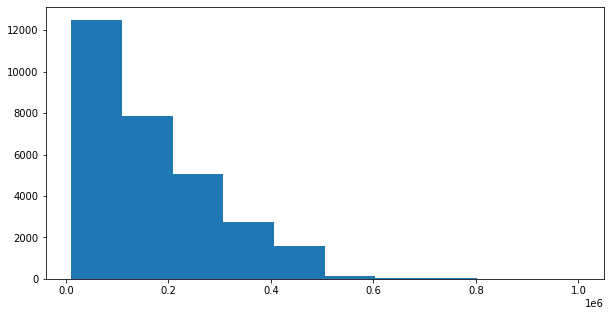

In [41]:
plt.figure(figsize=(10,5))
plt.hist(y)

plt.show()

In [43]:
PromedioIncial= np.mean(y)
print(PromedioIncial)

167484.32266666667


**Verificar Normalidad**

Grafica Q-Q

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

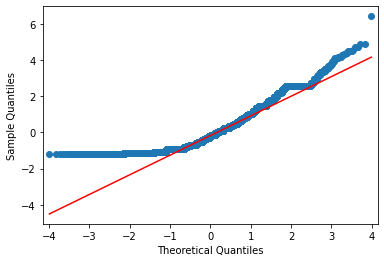

In [47]:
sms.qqplot(y,fit=True,line="q");

* desde la grafica de cuantiles, el monto del credito no parece ser normal

**Test de Normalidad**

* H0: El Monto del Otorgado a los clientes se comporta de forma normal
* Ha: El Monto del Otorgado a los clientes No se comporta de forma normal

alfa: significancia que puede ser del 5 o 10 %

Generar un P valor

* si p valor es menor alfa, Rechazamos h0, lo que indica que la variable no es normal


Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

In [49]:
stat,pvalor=stats.shapiro(y)

/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
pvalor

0.0

* Segun shapiro, el monto de credito no es Normal

**Consecuencias de la falta de normalidad**

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

**Teorema del Limite Central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal.

## **Normalidad puede estar afectada por Datos Atipicos**

**Detectar Datos Atípicos Univariado**

**Boxplot**

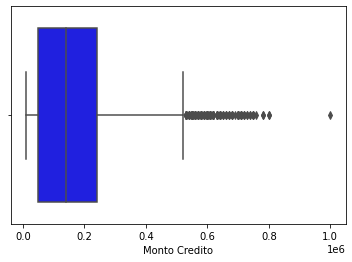

In [56]:
sns.boxplot(x=y,color="blue");

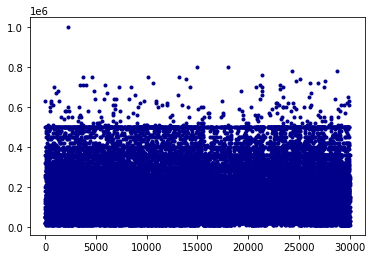

In [57]:
## Grafico puntos
plt.plot(y,".",color="darkblue");

In [58]:
q1,q3=np.percentile(y,[25,75])

In [59]:
print(f'25%: {q1} y 75% : {q3}')

25%: 50000.0 y 75% : 240000.0


In [64]:
RIC= q3-q1

In [74]:
LimiteSuperior=q3+1.5*(RIC)
LimiteSuperior

525000.0

In [75]:
LimiteInferior=q1-1.5*(RIC)
LimiteInferior

-235000.0

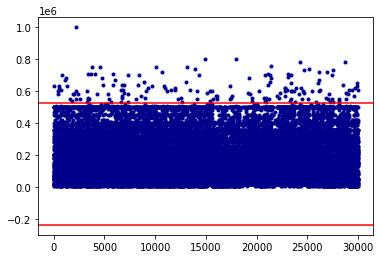

In [76]:
plt.plot(y,".",color="darkblue")
plt.axhline(y=LimiteSuperior,color="red")
plt.axhline(y=LimiteInferior,color="red");

## **Clientes Atipicos con Monto Prestado**

In [77]:
df_MontoAtipicos= df[df["Monto Credito"]> LimiteSuperior].reset_index(drop=True)

In [78]:
df_MontoAtipicos.head()

,ID,Monto Credito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,GrupoEdad,Eduacion_Homo,GeneroHomo,EstadoHomo
0,13,630000.000,41,-1,0,-1,-1,-1,-1,12137.000,...,6500.000,6500.000,6500.000,2870.000,0.000,0,Adulto,Universidad,Femenino,Soltero
1,434,580000.000,36,0,0,0,0,0,0,159760.000,...,6565.000,5951.000,6006.000,5894.000,5946.000,0,Adulto,Posgrado,Femenino,Casado
2,452,600000.000,53,2,2,0,0,0,0,467150.000,...,18000.000,16000.000,16000.000,21000.000,20000.000,1,Adulto,Posgrado,Masculino,Casado
3,528,620000.000,45,2,2,0,0,0,0,160837.000,...,6200.000,6000.000,6000.000,6500.000,6000.000,1,Adulto,Universidad,Femenino,Casado
4,556,630000.000,47,0,0,0,-1,-1,-2,37850.000,...,1207.000,2632.000,8654.000,0.000,4981.000,0,Adulto,Universidad,Femenino,Casado


In [79]:
df_MontoAtipicos.describe()

,ID,Monto Credito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora
count,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,...,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000
mean,15589.898,617844.311,39.329,-0.317,-0.407,-0.431,-0.473,-0.461,-0.503,178937.994,...,156153.551,146738.246,144621.832,16107.186,16426.036,25239.599,17180.012,24235.844,22004.862,0.114
std,9362.862,72652.994,8.311,0.995,1.001,0.985,0.884,0.897,0.956,201947.125,...,185184.014,181685.088,170796.931,35164.308,36659.287,85733.151,48560.703,55419.014,48850.430,0.318
min,13.000,530000.000,28.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-509.000,...,-2800.000,-261.000,-736.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6752.500,560000.000,32.500,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,12136.500,...,7114.000,6678.000,7839.500,2870.000,2450.000,2509.500,2032.500,2634.500,3000.000,0.000
50%,16102.000,600000.000,38.000,0.000,0.000,0.000,0.000,0.000,0.000,83707.000,...,60479.000,63218.000,67667.000,8229.000,8348.000,7721.000,7000.000,7253.000,7511.000,0.000
75%,23584.500,655000.000,45.000,0.000,0.000,0.000,0.000,0.000,0.000,338822.500,...,286203.500,249625.500,238365.000,17008.000,17154.500,15079.500,14500.000,17018.000,16993.500,0.000
max,29964.000,1000000.000,67.000,2.000,2.000,3.000,3.000,4.000,6.000,964511.000,...,891586.000,927171.000,961664.000,323014.000,401003.000,896040.000,528897.000,417990.000,422000.000,1.000


In [80]:
df_MontoAtipicos.shape

(167, 26)

In [82]:
(167/30000)*100

0.5566666666666666

In [83]:
df_MontoAtipicos.Mora.value_counts(normalize=True)

0   0.886
1   0.114
Name: Mora, dtype: float64

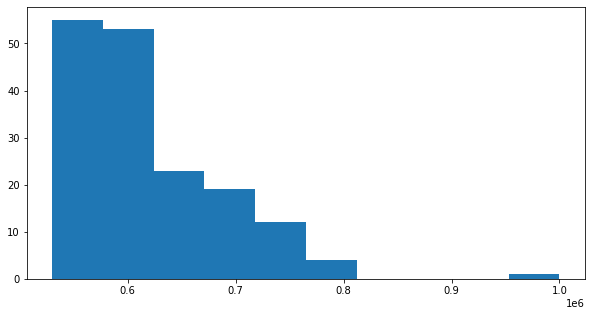

In [84]:
plt.figure(figsize=(10,5))
plt.hist(df_MontoAtipicos["Monto Credito"])
plt.show()

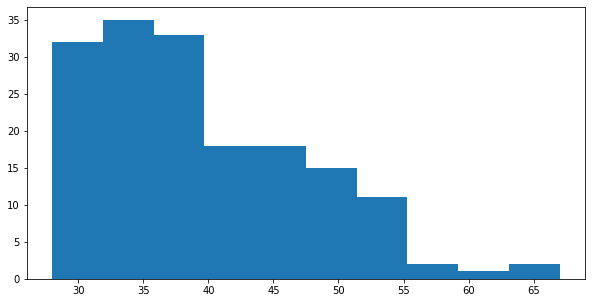

In [85]:
plt.figure(figsize=(10,5))
plt.hist(df_MontoAtipicos.Edad)
plt.show()

In [87]:
df_MontoAtipicos.GrupoEdad.value_counts(normalize=True)

Adulto         0.862
Joven          0.120
Adulto Mayor   0.018
Name: GrupoEdad, dtype: float64

In [88]:
df_MontoAtipicos.Eduacion_Homo.value_counts(normalize=True)

Posgrado      0.561
Universidad   0.329
Bachiller     0.104
Otros         0.006
Name: Eduacion_Homo, dtype: float64

In [89]:
df_MontoAtipicos.to_excel("ClientesAtipicosMontoCredito.xlsx")

## **Clientes sin Atipicos con Monto Prestado**

In [90]:
df_Monto_Sin_Atipicos= df[df["Monto Credito"]<= LimiteSuperior].reset_index(drop=True)

In [91]:
df_Monto_Sin_Atipicos.describe()

,ID,Monto Credito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora
count,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,...,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000,29833.000
mean,14997.201,164963.285,35.464,-0.015,-0.132,-0.165,-0.219,-0.265,-0.290,50508.406,...,42631.007,39715.642,38279.790,5605.119,5862.359,5113.647,4756.922,4690.586,5121.519,0.222
std,8656.362,125529.100,9.218,1.124,1.198,1.198,1.170,1.134,1.151,71650.809,...,62444.528,58902.829,57803.698,16382.411,22929.331,16388.582,15258.488,14680.486,17405.222,0.415
min,1.000,10000.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-165580.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7508.000,50000.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3520.000,...,2310.000,1749.000,1240.000,1000.000,820.000,390.000,291.000,244.000,102.000,0.000
50%,14994.000,140000.000,34.000,0.000,0.000,0.000,0.000,0.000,0.000,22284.000,...,19002.000,18070.000,16990.000,2100.000,2005.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22487.000,240000.000,41.000,0.000,0.000,0.000,0.000,0.000,0.000,66604.000,...,53952.000,49939.000,48914.000,5001.000,5000.000,4500.000,4000.000,4000.000,4000.000,0.000
max,30000.000,520000.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,653062.000,...,706864.000,587067.000,699944.000,873552.000,1684259.000,889043.000,621000.000,426529.000,528666.000,1.000


In [93]:
PromedioSinAtipico=np.mean(df_Monto_Sin_Atipicos["Monto Credito"])
PromedioSinAtipico

164963.2849529045

In [94]:
PromedioIncial

167484.32266666667